In [1]:
import copy
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

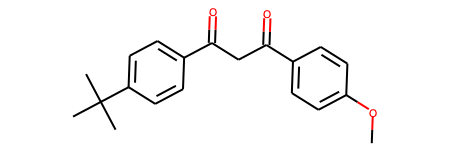

In [2]:
smi = 'CC(C)(C)C1=CC=C(C=C1)C(=O)CC(=O)C2=CC=C(C=C2)OC'
mol_t = Chem.MolFromSmiles(smi)
mol_t

In [16]:
for i in mol_t.GetAtoms():
    i.SetIntProp("atom_idx", i.GetIdx())
for i in mol_t.GetBonds():
    i.SetIntProp("bond_idx", i.GetIdx())

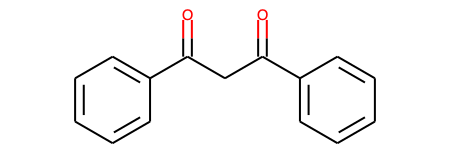

In [17]:
mol_s = MurckoScaffold.GetScaffoldForMol(mol_t)
mol_s

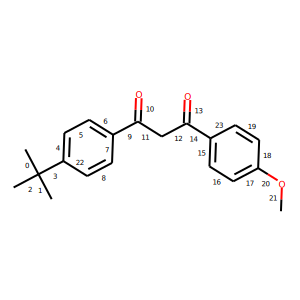

In [18]:
d2d = rdMolDraw2D.MolDraw2DSVG(300,300)
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(mol_t)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [21]:
ringinfo = mol_t.GetRingInfo()
bondrings = ring_info.BondRings()
bondrings

((22, 8, 7, 6, 5, 4), (16, 17, 18, 19, 23, 15))

In [30]:
bondring_list = list(bondrings[0]+bondrings[1])
bondring_list

[22, 8, 7, 6, 5, 4, 16, 17, 18, 19, 23, 15]

In [32]:
all_bonds_idx = [bond.GetIdx() for bond in mol_t.GetBonds()]
print(all_bonds_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [37]:
none_ring_bonds_list = []
for i in all_bonds_idx:
    if i not in bondring_list:
        none_ring_bonds_list.append(i)
none_ring_bonds_list

[0, 1, 2, 3, 9, 10, 11, 12, 13, 14, 20, 21]

In [41]:
mol_t.GetBondWithIdx(4).GetBondTypeAsDouble() 

1.5

In [42]:
mol_t.GetBondWithIdx(3).GetBondTypeAsDouble() 

1.0

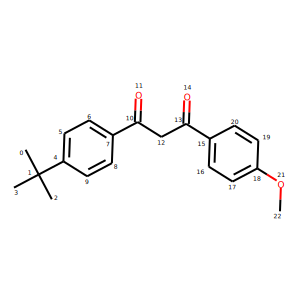

In [45]:
d2d = rdMolDraw2D.MolDraw2DSVG(300,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mol_t)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [46]:
mol_t.GetAtomWithIdx(4).IsInRing()

True

In [47]:
mol_t.GetBondWithIdx(1).IsInRing()

False

In [60]:
cut_bonds = []
for bond_idx in none_ring_bonds_list:
    bgn_atom_idx = mol_t.GetBondWithIdx(bond_idx).GetBeginAtomIdx()
    ebd_atom_idx = mol_t.GetBondWithIdx(bond_idx).GetEndAtomIdx()
    if mol_t.GetBondWithIdx(bond_idx).GetBondTypeAsDouble() == 1.0:
        if mol_t.GetAtomWithIdx(bgn_atom_idx).IsInRing()+mol_t.GetAtomWithIdx(ebd_atom_idx).IsInRing() == 1:
            t_bond = mol_t.GetBondWithIdx(bond_idx)
            t_bond_idx = t_bond.GetIntProp("bond_idx")
            cut_bonds.append(t_bond_idx)

In [61]:
cut_bonds

[3, 9, 14, 20]

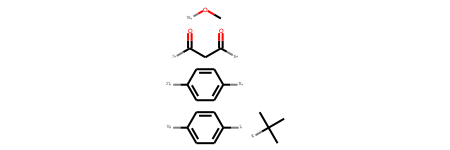

In [62]:
res = Chem.FragmentOnBonds(mol_t, cut_bonds)
res

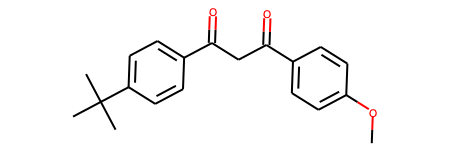

In [63]:
mol_t

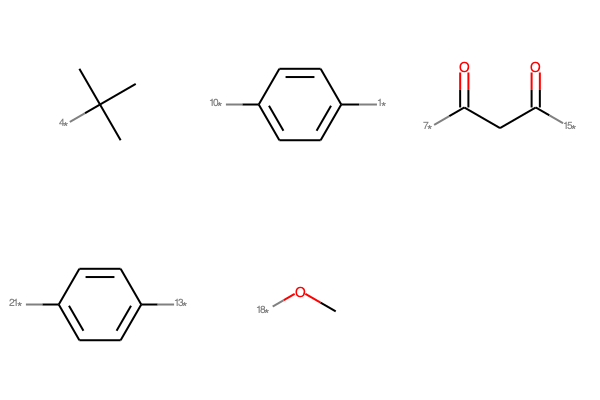

In [64]:
frgs = Chem.GetMolFrags(res, asMols=True)
Draw.MolsToGridImage(frgs)

In [ ]:
# def is_in_samering(idx1, idx2, bond_rings):
#     for bond_ring in bond_rings:
#         if idx1 in bond_ring and idx2 in bond_ring:
#             return True
#     return False


# elif not is_in_samering(bgn_atom_idx, end_atom_idx, bond_rings) 
# and mol_t.GetAtomWithIdx(bgn_atom_idx).IsInRing()+mol_t.GetAtomWithIdx(end_atom_idx).IsInRing() == 2: